In [ ]:
!pip install kaggle

In [ ]:
import tensorflow as tf
print("Tensorflow version " + tf.__version__)

try:
  tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
  print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])
except ValueError:
  raise BaseException('ERROR: Not connected to a TPU runtime; please see the previous cell in this notebook for instructions!')

tf.config.experimental_connect_to_cluster(tpu)
tf.tpu.experimental.initialize_tpu_system(tpu)
tpu_strategy = tf.distribute.TPUStrategy(tpu)

Tensorflow version 2.12.0
Running on TPU  ['10.116.136.234:8470']


In [ ]:
import os
os.system('gcloud beta services identity create --service tpu.googleapis.com --project $PROJECT_ID')

512

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d jessicali9530/stanford-dogs-dataset


100% 750M/750M [00:24<00:00, 39.8MB/s]
100% 750M/750M [00:24<00:00, 32.5MB/s]


In [ ]:
!unzip stanford-dogs-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: images/Images/n02108089-boxer/n02108089_11687.jpg  
  inflating: images/Images/n02108089-boxer/n02108089_117.jpg  
  inflating: images/Images/n02108089-boxer/n02108089_11807.jpg  
  inflating: images/Images/n02108089-boxer/n02108089_11875.jpg  
  inflating: images/Images/n02108089-boxer/n02108089_122.jpg  
  inflating: images/Images/n02108089-boxer/n02108089_12232.jpg  
  inflating: images/Images/n02108089-boxer/n02108089_125.jpg  
  inflating: images/Images/n02108089-boxer/n02108089_12738.jpg  
  inflating: images/Images/n02108089-boxer/n02108089_12739.jpg  
  inflating: images/Images/n02108089-boxer/n02108089_12827.jpg  
  inflating: images/Images/n02108089-boxer/n02108089_13340.jpg  
  inflating: images/Images/n02108089-boxer/n02108089_13526.jpg  
  inflating: images/Images/n02108089-boxer/n02108089_1353.jpg  
  inflating: images/Images/n02108089-boxer/n02108089_1355.jpg  
  inflating: images/Images/n02108089-boxer/n021

In [ ]:
import os
import numpy as np
data_path = "/content/images/Images"
breed_names = os.listdir(data_path)
n_classes = len(os.listdir(data_path))
print(n_classes)


120


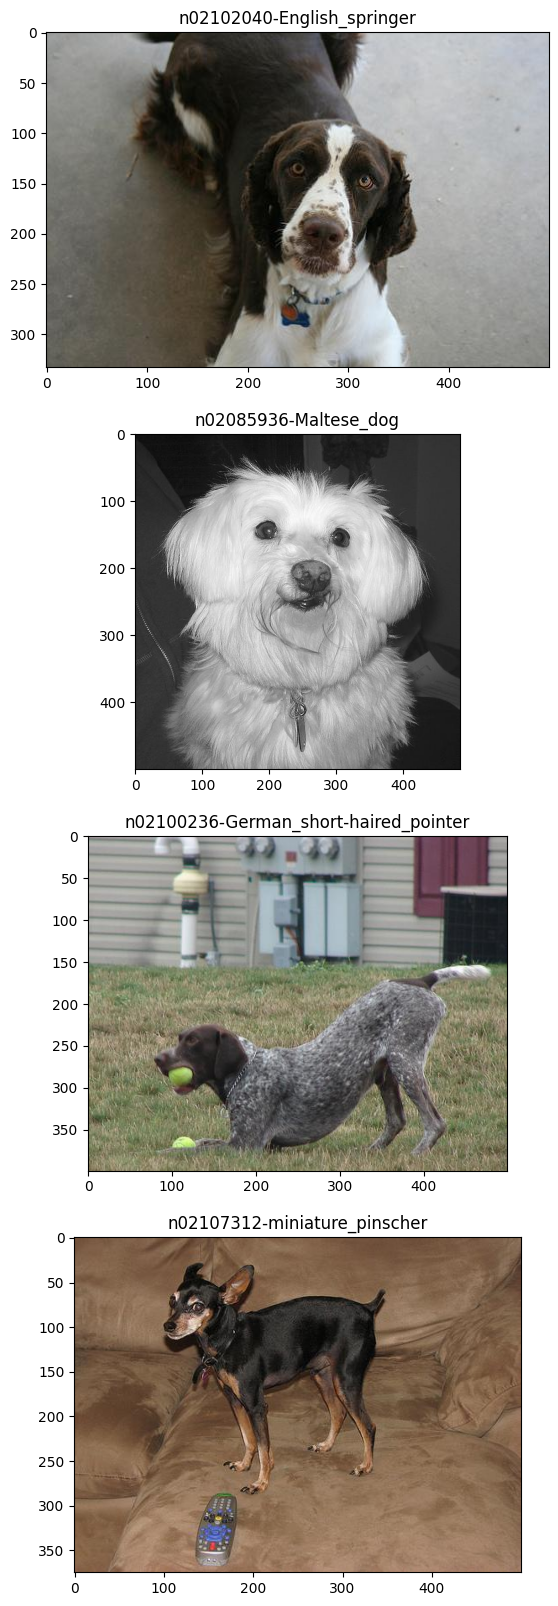

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
for i in range(4):
  breed = np.random.choice(breed_names)
  plt.subplot(421 + (i * 2))
  dog = np.random.choice(os.listdir('/content/annotations/Annotation/' + breed))
  img = plt.imread('images/Images/' + breed + '/' + dog + '.jpg')
  plt.imshow(img)
  plt.title(breed)

562500
['n02101006-Gordon_setter', 'n02102973-Irish_water_spaniel', 'n02110958-pug', 'n02094258-Norwich_terrier', 'n02089973-English_foxhound', 'n02102480-Sussex_spaniel', 'n02099429-curly-coated_retriever', 'n02091635-otterhound', 'n02111500-Great_Pyrenees', 'n02106550-Rottweiler', 'n02088094-Afghan_hound', 'n02113712-miniature_poodle', 'n02110627-affenpinscher', 'n02106030-collie', 'n02107908-Appenzeller', 'n02086910-papillon', 'n02102177-Welsh_springer_spaniel', 'n02087394-Rhodesian_ridgeback', 'n02111129-Leonberg', 'n02109525-Saint_Bernard', 'n02109961-Eskimo_dog', 'n02116738-African_hunting_dog', 'n02102040-English_springer', 'n02096051-Airedale', 'n02099849-Chesapeake_Bay_retriever', 'n02093859-Kerry_blue_terrier', 'n02100877-Irish_setter', 'n02092339-Weimaraner', 'n02115641-dingo', 'n02099267-flat-coated_retriever', 'n02086646-Blenheim_spaniel', 'n02097298-Scotch_terrier', 'n02107683-Bernese_mountain_dog', 'n02100583-vizsla', 'n02093428-American_Staffordshire_terrier', 'n0208907

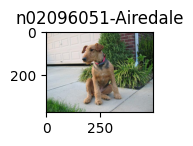

In [ ]:
  breed = np.random.choice(breed_names)
  plt.subplot(421 + (i * 2))
  dog = np.random.choice(os.listdir('/content/annotations/Annotation/' + breed))
  img = plt.imread('images/Images/' + breed + '/' + dog + '.jpg')
  plt.imshow(img)
  plt.title(breed)
  print(img.size)
  print(os.listdir('/content/annotations/Annotation/'))

In [ ]:
images = []
labels = []
dogs = []
for name in breed_names:
  for dog in os.listdir('/content/annotations/Annotation/' + name):
    images.append('images/Images/' + name + '/' + dog + '.jpg')
    labels.append(name)
print(len(images))
print(len(labels))


20580
20580


Text(0.5, 1.0, 'n02112350-keeshond')

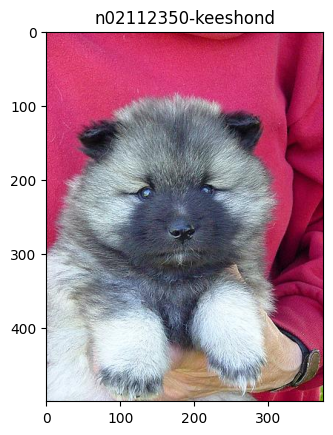

In [ ]:
plt.imshow(plt.imread(images[100]))
plt.title(labels[100])


In [ ]:
import tensorflow as tf
train_ds = tf.keras.utils.image_dataset_from_directory('/content/images/Images',
                                                      validation_split=0.2,
                                                       subset='training',
                                                       seed=42,
                                                       image_size = (256, 256),
                                                       batch_size=32,
                                                      shuffle=True,
                                                      )
val_ds = tf.keras.utils.image_dataset_from_directory('/content/images/Images',
                                                      validation_split=0.2,
                                                    subset='validation',
                                                      seed=42,
                                                     image_size=(256, 256),
                                                     batch_size = 32,
                                                     shuffle=True)
print(train_ds.class_names)

Found 20580 files belonging to 120 classes.
Using 16464 files for training.
Found 20580 files belonging to 120 classes.
Using 4116 files for validation.
['n02085620-Chihuahua', 'n02085782-Japanese_spaniel', 'n02085936-Maltese_dog', 'n02086079-Pekinese', 'n02086240-Shih-Tzu', 'n02086646-Blenheim_spaniel', 'n02086910-papillon', 'n02087046-toy_terrier', 'n02087394-Rhodesian_ridgeback', 'n02088094-Afghan_hound', 'n02088238-basset', 'n02088364-beagle', 'n02088466-bloodhound', 'n02088632-bluetick', 'n02089078-black-and-tan_coonhound', 'n02089867-Walker_hound', 'n02089973-English_foxhound', 'n02090379-redbone', 'n02090622-borzoi', 'n02090721-Irish_wolfhound', 'n02091032-Italian_greyhound', 'n02091134-whippet', 'n02091244-Ibizan_hound', 'n02091467-Norwegian_elkhound', 'n02091635-otterhound', 'n02091831-Saluki', 'n02092002-Scottish_deerhound', 'n02092339-Weimaraner', 'n02093256-Staffordshire_bullterrier', 'n02093428-American_Staffordshire_terrier', 'n02093647-Bedlington_terrier', 'n02093754-Bor

In [ ]:
test = tf.data.Dataset.from_tensor_slices(list(train_ds))

InvalidArgumentError: ignored

In [ ]:
print(type(train_ds))
image, labels = next(iter(train_ds))
image = image.numpy()
labels = labels.numpy()
print(image.size)
print(labels)
image_test, labels_test = next(iter(val_ds))
image_test = image_test.numpy()
labels_test = labels_test.numpy()

<class 'tensorflow.python.data.ops.prefetch_op._PrefetchDataset'>
6291456
[ 68 114 107  74  21  39  92  25  59 116  21  11   4   7  54  95  70  38
  48  51   4  50  64  46  83  44 117   2  35  46  60  39]


In [ ]:
class_names = train_ds.class_names
img_list = []
lab_list = []
for images, labels in train_ds.take(-1):
  img_list.append(images)
  for i in range(4):
    ax = plt.subplot()
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.show()

NameError: ignored

In [ ]:
norm_layer = tf.keras.layers.Rescaling(1./255)

norm_train_ds = train_ds.map(lambda x, y: (norm_layer(x), y))
img, label = next(iter(norm_train_ds))
print(img[5])
print(label[5])


tf.Tensor(
[[[0.24574144 0.21044731 0.1751532 ]
  [0.20571385 0.17216606 0.13774511]
  [0.34359685 0.31614584 0.2847733 ]
  ...
  [0.25591302 0.15395221 0.06375613]
  [0.26796877 0.16600798 0.07581189]
  [0.42306986 0.3211091  0.230913  ]]

 [[0.24937195 0.21407783 0.17878371]
  [0.2048407  0.1712929  0.13687195]
  [0.3425858  0.31513482 0.28376228]
  ...
  [0.2583793  0.15641852 0.06622243]
  [0.27189034 0.16992955 0.07973346]
  [0.42699143 0.32503065 0.23483457]]

 [[0.25663298 0.22133887 0.18604474]
  [0.20396754 0.17041974 0.13599879]
  [0.3415748  0.31412378 0.28275123]
  ...
  [0.26230088 0.16034009 0.070144  ]
  [0.2788603  0.17689952 0.08670343]
  [0.43483457 0.3328738  0.2426777 ]]

 ...

 [[0.08134191 0.11663604 0.14408702]
  [0.12113971 0.15643384 0.18213849]
  [0.13915442 0.17444853 0.19405638]
  ...
  [0.15686275 0.15686275 0.15686275]
  [0.19649205 0.19649205 0.19649205]
  [0.22599572 0.22599572 0.22599572]]

 [[0.07103248 0.1063266  0.13377759]
  [0.1324755  0.16776961 0

In [ ]:
train_ds = train_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
input_shape = (64,256, 256, 3)

model1 = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.Conv2D(64, 5, activation= 'relu', strides=(4,4),
    input_shape =input_shape, kernel_regularizer='l2', batch_size=32),
    tf.keras.layers.MaxPooling2D(pool_size=(4,4), strides=(2,2)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Conv2D(200,5, activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(pool_size=(3,3), strides=(2,2)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(250, 3, activation='relu', strides = (1,1), padding='same',kernel_regularizer='l2'),
    tf.keras.layers.Conv2D(250, 3, activation='relu', strides = (1,1), padding='same', kernel_regularizer='l2'),
    tf.keras.layers.Conv2D(250, 3, activation='relu', strides = (1,1), padding='same',kernel_regularizer='l2'),
    tf.keras.layers.MaxPooling2D(pool_size=(3,3), strides = (2,2)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.BatchNormalization(),
   # tf.keras.layers.Conv2D(250, 3, activation='relu', strides = (1,1), padding='same'),
    #tf.keras.layers.Conv2D(250, 3, activation='relu', strides = (1,1), padding='same'),
    #tf.keras.layers.Conv2D(250, 3, activation='relu', strides = (1,1), padding='same'),
   # tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
   # tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
   # tf.keras.layers.Dense(512, activation = 'relu'),
    #tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256, activation = 'relu'),
    tf.keras.layers.Dense(120, activation='softmax')
])



In [ ]:
opt = tf.keras.optimizers.SGD(learning_rate=0.001)
model1.compile(optimizer=opt,
                loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])
model1.fit(image, labels, validation_data = (image_test, labels_test), epochs = 500, batch_size=32)

Epoch 1/500
1/1 [==============================] - 2s 2s/step - loss: 12.2270 - sparse_categorical_accuracy: 0.0000e+00 - val_loss: 12.0703 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 2/500
1/1 [==============================] - 0s 72ms/step - loss: 12.8122 - sparse_categorical_accuracy: 0.0000e+00 - val_loss: 12.0698 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 3/500
1/1 [==============================] - 0s 63ms/step - loss: 12.6442 - sparse_categorical_accuracy: 0.0000e+00 - val_loss: 12.0695 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 4/500
1/1 [==============================] - 0s 64ms/step - loss: 12.6585 - sparse_categorical_accuracy: 0.0000e+00 - val_loss: 12.0697 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 5/500
1/1 [==============================] - 0s 75ms/step - loss: 12.6510 - sparse_categorical_accuracy: 0.0000e+00 - val_loss: 12.0691 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 6/500
1/1 [==============================] - 0s 64ms/ste

In [ ]:
model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_4 (Rescaling)     (32, 256, 256, 3)         0         
                                                                 
 random_flip_4 (RandomFlip)  (32, 256, 256, 3)         0         
                                                                 
 random_rotation_4 (RandomR  (32, 256, 256, 3)         0         
 otation)                                                        
                                                                 
 conv2d_16 (Conv2D)          (32, 63, 63, 64)          4864      
                                                                 
 max_pooling2d_8 (MaxPoolin  (32, 30, 30, 64)          0         
 g2D)                                                            
                                                                 
 dropout_10 (Dropout)        (32, 30, 30, 64)         

In [ ]:
results = model1.evaluate(image_test, labels_test)

1/1 [==============================] - 0s 37ms/step - loss: 19.3114 - sparse_categorical_accuracy: 0.0000e+00


In [ ]:
simple_dense = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation = 'relu'),
    tf.keras.layers.Dense(120, activation='softmax')
])
simple_dense.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1),
                     loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                     metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])



In [ ]:
simple_dense.fit(train_ds, epochs = 10)

Epoch 1/10
258/258 [==============================] - 7s 27ms/step - loss: 4.7793 - sparse_categorical_accuracy: 0.0124
Epoch 2/10
258/258 [==============================] - 7s 27ms/step - loss: 4.7791 - sparse_categorical_accuracy: 0.0123
Epoch 3/10
258/258 [==============================] - 7s 27ms/step - loss: 4.7788 - sparse_categorical_accuracy: 0.0124
Epoch 4/10
258/258 [==============================] - 7s 27ms/step - loss: 4.7797 - sparse_categorical_accuracy: 0.0123
Epoch 5/10
258/258 [==============================] - 7s 27ms/step - loss: 4.7785 - sparse_categorical_accuracy: 0.0124
Epoch 6/10
258/258 [==============================] - 7s 27ms/step - loss: 4.7785 - sparse_categorical_accuracy: 0.0124
Epoch 7/10
258/258 [==============================] - 7s 27ms/step - loss: 4.7784 - sparse_categorical_accuracy: 0.0124
Epoch 8/10
258/258 [==============================] - 7s 27ms/step - loss: 4.7784 - sparse_categorical_accuracy: 0.0124
Epoch 9/10
258/258 [====================

In [ ]:
simple_dense.summary()


Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_16 (Rescaling)    (None, 256, 256, 3)       0         
                                                                 
 flatten_11 (Flatten)        (None, 196608)            0         
                                                                 
 dense_41 (Dense)            (None, 1024)              201327616 
                                                                 
 dense_42 (Dense)            (None, 120)               123000    
                                                                 
Total params: 201450616 (768.47 MB)
Trainable params: 201450616 (768.47 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
simple_dense.evaluate(val_ds)

65/65 [==============================] - 1s 18ms/step - loss: 4.7861 - sparse_categorical_accuracy: 0.0117


[4.786096572875977, 0.011661808006465435]

In [ ]:
simple_cnn = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./250),
    tf.keras.layers.Conv2D(32, 3, activation= 'relu', input_shape = (None, 256, 256, 3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(120, activation='softmax')
])
simple_cnn.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1),
                     loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                     metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])



In [ ]:
simple_cnn.fit(train_ds, epochs = 10)

Epoch 1/10
258/258 [==============================] - 10s 35ms/step - loss: 4.7992 - sparse_categorical_accuracy: 0.0138
Epoch 2/10
258/258 [==============================] - 9s 34ms/step - loss: 4.6505 - sparse_categorical_accuracy: 0.0222
Epoch 3/10
258/258 [==============================] - 9s 34ms/step - loss: 4.5325 - sparse_categorical_accuracy: 0.0356
Epoch 4/10
258/258 [==============================] - 9s 34ms/step - loss: 4.3517 - sparse_categorical_accuracy: 0.0590
Epoch 5/10
258/258 [==============================] - 9s 34ms/step - loss: 4.1416 - sparse_categorical_accuracy: 0.0923
Epoch 6/10
258/258 [==============================] - 9s 34ms/step - loss: 3.9230 - sparse_categorical_accuracy: 0.1331
Epoch 7/10
258/258 [==============================] - 9s 34ms/step - loss: 3.3541 - sparse_categorical_accuracy: 0.2361
Epoch 8/10
258/258 [==============================] - 9s 34ms/step - loss: 2.4918 - sparse_categorical_accuracy: 0.4287
Epoch 9/10
258/258 [===================

In [ ]:
simple_cnn.evaluate(val_ds)

65/65 [==============================] - 1s 21ms/step - loss: 8.2163 - sparse_categorical_accuracy: 0.0386


[8.216259956359863, 0.03862973675131798]